In [1]:
from context import QNetOptimizer as QNopt

import matplotlib.pyplot as plt
from pennylane import numpy as np
import json

from os import listdir
from os.path import isfile, join
import re

In [2]:
def analyze_data_files(data_files):
    data_dicts = []
    for filepath in data_files:
        with open(filepath) as file:
            data_dicts.append(json.load(file))
    
    results = {}
    noise_params = []
    for data_dict in data_dicts:
        for i in range(len(data_dict["noise_params"])):
            if np.isnan(data_dict["max_scores"][i]):
                continue
            
            noise_key = "{:.2f}".format(data_dict["noise_params"][i])
            
            if noise_key in results:
                results[noise_key].append(data_dict["max_scores"][i])
            else:
                results[noise_key] = [data_dict["max_scores"][i]]
                noise_params.append(np.round(data_dict["noise_params"][i],5))
    
    sorted_noise_params = np.sort(noise_params)
    max_scores = [
        max(results["{:.2f}".format(noise_param)])
        for noise_param in sorted_noise_params
    ]
    mean_scores = [
        np.mean(results["{:.2f}".format(noise_param)], axis=0)
        for noise_param in sorted_noise_params
    ]
    std_errs = [
        np.std(results[noise_key], axis=0) / np.sqrt(len(results[noise_key]))
        for noise_key in ["{:.2f}".format(noise_param) for noise_param in sorted_noise_params]
    ]
    
    
    return sorted_noise_params, max_scores, mean_scores, std_errs     

In [95]:
dep_path = "../../script/data/chain_n-local_1-qubit_depolarizing/"
dep_path_files = listdir(dep_path)

local_rot_n2_dep_files = [
    join(dep_path, f) for f in dep_path_files if (
        f.endswith(".json") and isfile(join(dep_path, f)) and bool(re.match(r".*local_rot_n-2.*", f))
    )
]
print("num local_rot_n-2 files : ", len(local_rot_n2_dep_files))

(
    local_rot_n2_noise_params_dep,
    local_rot_n2_max_scores_dep,
    local_rot_n2_mean_scores_dep,
    local_rot_n2_std_errs_dep
) = analyze_data_files(local_rot_n2_dep_files)

local_rot_n3_dep_files = [
    join(dep_path, f) for f in dep_path_files if (
        f.endswith(".json") and isfile(join(dep_path, f)) and bool(re.match(r".*local_rot_n-3.*", f))
    )
]
print("num local_rot_n-3 files : ", len(local_rot_n3_dep_files))

(
    local_rot_n3_noise_params_dep,
    local_rot_n3_max_scores_dep,
    local_rot_n3_mean_scores_dep,
    local_rot_n3_std_errs_dep
) = analyze_data_files(local_rot_n3_dep_files)

bell_n2_dep_files = [
    join(dep_path, f) for f in dep_path_files if (
        f.endswith(".json") and isfile(join(dep_path, f)) and bool(re.match(r".*bell_n-2.*", f))
    )
]
print("num bell_n-2 files : ", len(bell_n2_dep_files))

(
    bell_n2_noise_params_dep,
    bell_n2_max_scores_dep,
    bell_n2_mean_scores_dep,
    bell_n2_std_errs_dep
) = analyze_data_files(bell_n2_dep_files)

bell_n3_dep_files = [
    join(dep_path, f) for f in dep_path_files if (
        f.endswith(".json") and isfile(join(dep_path, f)) and bool(re.match(r".*bell_n-3.*", f))
    )
]
print("num bell_n-3 files : ", len(bell_n3_dep_files))

(
    bell_n3_noise_params_dep,
    bell_n3_max_scores_dep,
    bell_n3_mean_scores_dep,
    bell_n3_std_errs_dep
) = analyze_data_files(bell_n3_dep_files)

arb_n2_dep_files = [
    join(dep_path, f) for f in dep_path_files if (
        f.endswith(".json") and isfile(join(dep_path, f)) and bool(re.match(r".*arb_n-2.*", f))
    )
]
print("num arb_n-2 files : ", len(arb_n2_dep_files))

(
    arb_n2_noise_params_dep,
    arb_n2_max_scores_dep,
    arb_n2_mean_scores_dep,
    arb_n2_std_errs_dep
) = analyze_data_files(arb_n2_dep_files)

arb_n3_dep_files = [
    join(dep_path, f) for f in dep_path_files if (
        f.endswith(".json") and isfile(join(dep_path, f)) and bool(re.match(r".*arb_n-3.*", f))
    )
]
print("num arb_n-3 files : ", len(arb_n3_dep_files))

(
    arb_n3_noise_params_dep,
    arb_n3_max_scores_dep,
    arb_n3_mean_scores_dep,
    arb_n3_std_errs_dep
) = analyze_data_files(arb_n3_dep_files)

num local_rot_n-2 files :  9
num local_rot_n-3 files :  7
num bell_n-2 files :  3
num bell_n-3 files :  3
num arb_n-2 files :  7
num arb_n-3 files :  6


In [102]:
amp_damp_path = "../../script/data/chain_n-local_1-qubit_amplitude_damping/"
amp_damp_path_files = listdir(amp_damp_path)

local_rot_n2_amp_damp_files = [
    join(amp_damp_path, f) for f in amp_damp_path_files if (
        f.endswith(".json") and isfile(join(amp_damp_path, f)) and bool(re.match(r".*local_rot_n-2.*", f))
    )
]
print("num local_rot_n-2 files : ", len(local_rot_n2_amp_damp_files))

(
    local_rot_n2_noise_params_amp_damp,
    local_rot_n2_max_scores_amp_damp,
    local_rot_n2_mean_scores_amp_damp,
    local_rot_n2_std_errs_amp_damp
) = analyze_data_files(local_rot_n2_amp_damp_files)

local_rot_n3_amp_damp_files = [
    join(amp_damp_path, f) for f in amp_damp_path_files if (
        f.endswith(".json") and isfile(join(amp_damp_path, f)) and bool(re.match(r".*local_rot_n-3.*", f))
    )
]
print("num local_rot_n-3 files : ", len(local_rot_n3_amp_damp_files))

(
    local_rot_n3_noise_params_amp_damp,
    local_rot_n3_max_scores_amp_damp,
    local_rot_n3_mean_scores_amp_damp,
    local_rot_n3_std_errs_amp_damp
) = analyze_data_files(local_rot_n3_amp_damp_files)

bell_n2_amp_damp_files = [
    join(amp_damp_path, f) for f in amp_damp_path_files if (
        f.endswith(".json") and isfile(join(amp_damp_path, f)) and bool(re.match(r".*bell_n-2.*", f))
    )
]
print("num bell_n-2 files : ", len(bell_n2_amp_damp_files))

(
    bell_n2_noise_params_amp_damp,
    bell_n2_max_scores_amp_damp,
    bell_n2_mean_scores_amp_damp,
    bell_n2_std_errs_amp_damp
) = analyze_data_files(bell_n2_amp_damp_files)

bell_n3_amp_damp_files = [
    join(amp_damp_path, f) for f in amp_damp_path_files if (
        f.endswith(".json") and isfile(join(amp_damp_path, f)) and bool(re.match(r".*bell_n-3.*", f))
    )
]
print("num bell_n-3 files : ", len(bell_n3_amp_damp_files))

(
    bell_n3_noise_params_amp_damp,
    bell_n3_max_scores_amp_damp,
    bell_n3_mean_scores_amp_damp,
    bell_n3_std_errs_amp_damp
) = analyze_data_files(bell_n3_amp_damp_files)


arb_n2_amp_damp_files = [
    join(amp_damp_path, f) for f in amp_damp_path_files if (
        f.endswith(".json") and isfile(join(amp_damp_path, f)) and bool(re.match(r".*arb_n-2.*", f))
    )
]
print("num arb_n-2 files : ", len(arb_n2_amp_damp_files))

(
    arb_n2_noise_params_amp_damp,
    arb_n2_max_scores_amp_damp,
    arb_n2_mean_scores_amp_damp,
    arb_n2_std_errs_amp_damp
) = analyze_data_files(arb_n2_amp_damp_files)

arb_n3_amp_damp_files = [
    join(amp_damp_path, f) for f in amp_damp_path_files if (
        f.endswith(".json") and isfile(join(amp_damp_path, f)) and bool(re.match(r".*arb_n-3.*", f))
    )
]
print("num arb_n-3 files : ", len(arb_n3_amp_damp_files))

(
    arb_n3_noise_params_amp_damp,
    arb_n3_max_scores_amp_damp,
    arb_n3_mean_scores_amp_damp,
    arb_n3_std_errs_amp_damp
) = analyze_data_files(arb_n3_amp_damp_files)

num local_rot_n-2 files :  9
num local_rot_n-3 files :  6
num bell_n-2 files :  7
num bell_n-3 files :  7
num arb_n-2 files :  6
num arb_n-3 files :  5


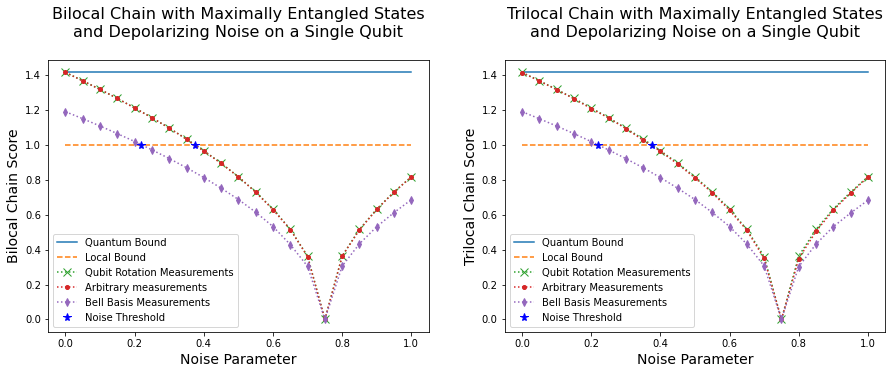

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(local_rot_n2_noise_params_dep, [2/np.sqrt(2)]*len(local_rot_n2_noise_params_dep), label="Quantum Bound")
ax1.plot(local_rot_n2_noise_params_dep, [1]*len(local_rot_n2_noise_params_dep), "--", label="Local Bound")

ax1.plot(local_rot_n2_noise_params_dep, local_rot_n2_max_scores_dep, ":x", markersize=8, label="Qubit Rotation Measurements")
# plt.errorbar(ent_noise_params, ent_mean_scores, ent_std_errs,linestyle="--", label="CHSH noise ")

ax1.plot(arb_n2_noise_params_dep, arb_n2_max_scores_dep, ":.", markersize=8, label="Arbitrary measurements")
ax1.plot(bell_n2_noise_params_dep, bell_n2_max_scores_dep, ":d", markersize=5, label="Bell Basis Measurements")

# plt.errorbar(arb_noise_params, arb_mean_scores, arb_std_errs,linestyle="--", label="CHSH noise ")

# plt.plot(rot_noise_params, rot_max_scores, label="max scores")
# plt.errorbar(rot_noise_params, rot_mean_scores, rot_std_errs,linestyle="--", label="CHSH noise ")

ax1.plot([(1-1/np.sqrt(2))*3/4, (1-1/2)*3/4], [1,1], "b*", markersize=8, label="Noise Threshold")
# ax1.plot([3/4], [0], "b*", markersize=8, label="Completely Depolarized")
ax1.plot()
ax1.set_title("Bilocal Chain with Maximally Entangled States\nand Depolarizing Noise on a Single Qubit\n", size=16)
ax1.set_ylabel("Bilocal Chain 22 Score", size=14)
ax1.set_xlabel("Noise Parameter", size=14)
ax1.legend()

ax2.plot(local_rot_n3_noise_params_dep, [2/np.sqrt(2)]*len(local_rot_n3_noise_params_dep), label="Quantum Bound")
ax2.plot(local_rot_n3_noise_params_dep, [1]*len(local_rot_n3_noise_params_dep), "--", label="Local Bound")

ax2.plot(local_rot_n3_noise_params_dep, local_rot_n3_max_scores_dep, ":x", markersize=8, label="Qubit Rotation Measurements")
# plt.errorbar(ent_noise_params, ent_mean_scores, ent_std_errs,linestyle="--", label="CHSH noise ")

ax2.plot(arb_n3_noise_params_dep, arb_n3_max_scores_dep, ":.", markersize=8, label="Arbitrary Measurements")
ax2.plot(bell_n3_noise_params_dep, bell_n3_max_scores_dep, ":d", markersize=5, label="Bell Basis Measurements")

# plt.errorbar(arb_noise_params, arb_mean_scores, arb_std_errs,linestyle="--", label="CHSH noise ")

# plt.plot(rot_noise_params, rot_max_scores, label="max scores")
# plt.errorbar(rot_noise_params, rot_mean_scores, rot_std_errs,linestyle="--", label="CHSH noise ")

ax2.plot([(1-1/np.sqrt(2))*3/4,(1-1/2)*3/4], [1,1], "b*", markersize=8, label="Noise Threshold")
ax2.plot()
ax2.set_title("Trilocal Chain with Maximally Entangled States\nand Depolarizing Noise on a Single Qubit\n", size=16)
ax2.set_ylabel("Trilocal Chain 22 Score", size=14)
ax2.set_xlabel("Noise Parameter", size=14)
# ax1.plot(ent_noise_params_amp, [2*np.sqrt(2*(1-p)) for p in ent_noise_params_amp])  # line of best fit
ax2.legend()


plt.show()

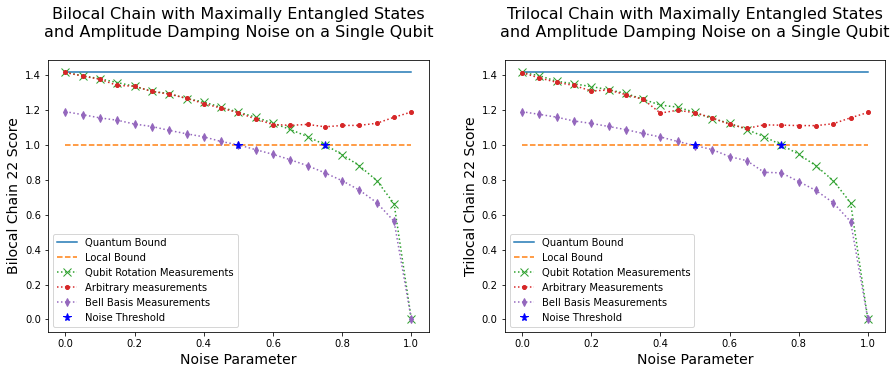

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(local_rot_n2_noise_params_amp_damp, [2/np.sqrt(2)]*len(local_rot_n2_noise_params_amp_damp), label="Quantum Bound")
ax1.plot(local_rot_n2_noise_params_amp_damp, [1]*len(local_rot_n2_noise_params_amp_damp), "--", label="Local Bound")

ax1.plot(local_rot_n2_noise_params_amp_damp, local_rot_n2_max_scores_amp_damp, ":x", markersize=8, label="Qubit Rotation Measurements")
# plt.errorbar(ent_noise_params, ent_mean_scores, ent_std_errs,linestyle="--", label="CHSH noise ")

ax1.plot(arb_n2_noise_params_amp_damp, arb_n2_max_scores_amp_damp, ":.", markersize=8, label="Arbitrary measurements")

ax1.plot(bell_n2_noise_params_amp_damp, bell_n2_max_scores_amp_damp, ":d", markersize=5, label="Bell Basis Measurements")
# plt.errorbar(arb_noise_params, arb_mean_scores, arb_std_errs,linestyle="--", label="CHSH noise ")

# plt.plot(rot_noise_params, rot_max_scores, label="max scores")
# plt.errorbar(rot_noise_params, rot_mean_scores, rot_std_errs,linestyle="--", label="CHSH noise ")

ax1.plot([0.5,0.75], [1,1], "b*", markersize=8, label="Noise Threshold")
# ax1.plot([3/4], [0], "b*", markersize=8, label="Completely Depolarized")
ax1.plot()
ax1.set_title("Bilocal Chain with Maximally Entangled States\nand Amplitude Damping Noise on a Single Qubit\n", size=16)
ax1.set_ylabel("Bilocal Chain 22 Score", size=14)
ax1.set_xlabel("Noise Parameter", size=14)
ax1.legend()

ax2.plot(local_rot_n3_noise_params_amp_damp, [2/np.sqrt(2)]*len(local_rot_n3_noise_params_amp_damp), label="Quantum Bound")
ax2.plot(local_rot_n3_noise_params_amp_damp, [1]*len(local_rot_n3_noise_params_amp_damp), "--", label="Local Bound")

ax2.plot(local_rot_n3_noise_params_amp_damp, local_rot_n3_max_scores_amp_damp, ":x", markersize=8, label="Qubit Rotation Measurements")
# plt.errorbar(ent_noise_params, ent_mean_scores, ent_std_errs,linestyle="--", label="CHSH noise ")

ax2.plot(arb_n3_noise_params_amp_damp, arb_n3_max_scores_amp_damp, ":.", markersize=8, label="Arbitrary Measurements")
ax2.plot(bell_n3_noise_params_amp_damp, bell_n3_max_scores_amp_damp, ":d", markersize=5, label="Bell Basis Measurements")
# plt.errorbar(arb_noise_params, arb_mean_scores, arb_std_errs,linestyle="--", label="CHSH noise ")

# plt.plot(rot_noise_params, rot_max_scores, label="max scores")
# plt.errorbar(rot_noise_params, rot_mean_scores, rot_std_errs,linestyle="--", label="CHSH noise ")

ax2.plot([0.5,0.75], [1,1], "b*", markersize=8, label="Noise Threshold")
ax2.plot()
ax2.set_title("Trilocal Chain with Maximally Entangled States\nand Amplitude Damping Noise on a Single Qubit\n", size=16)
ax2.set_ylabel("Trilocal Chain 22 Score", size=14)
ax2.set_xlabel("Noise Parameter", size=14)
# ax1.plot(ent_noise_params_amp, [2*np.sqrt(2*(1-p)) for p in ent_noise_params_amp])  # line of best fit
ax2.legend()

plt.show()